**<font size=48>Pandas</font>**<br>
<br>

Most parts of this notebook have been adapted from the Machine Learning course at the University of Tehran.

# Introduction
__[**Pandas**](https://pandas.pydata.org/)__ is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like .csv, .tsv, or .xlsx. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with Matplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.

Pandas is primarily used for
- DataFrame (database/Excel-like)
- Easy filtering, aggregation (also plotting, but less features than dedicated datavis packages)

In this tutorial, we will cover:
* [Exploring Data](#exploration)
* [Sorting](#sorting)
* [Indexing and retrieving data](#index)
* [Slicing](#slicing)
* [Applying Functions to Cells, Columns and Rows](#apply)
* [Grouping](#grouping)
* [DataFrame transformations](#transformations)
* [Visualizing Dataframe](#visualizing)

# <a id="exploration">Exploring Data</a>
The main data structures in Pandas are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of Series instances. DataFrames are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [62]:
import pandas as pd

pd.set_option("display.precision", 2)

In [63]:
df = pd.read_csv("churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let’s have a look at data dimensionality, feature names, and feature types.

In [64]:
print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

In [65]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe:

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

bool, int64, float64 and object are the data types of our features. We see that one feature is logical (bool), 3 features are of type object, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with shape.

We can **change the column type** with the `astype()` method. Let’s apply this method to the Churn feature to convert it into int64:

In [67]:
df["Churn"] = df["Churn"].astype("int64")

The **describe** method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [68]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


For categorical (type object) and boolean (type bool) features we can use the `value_counts()` method. Let’s take a look at the distribution of Churn:

In [69]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [70]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

# <a id="sorting">Sorting</a>
A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use `ascending=False` to sort in descending order):

In [10]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
296,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
780,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2087,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
128,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
485,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [71]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2812,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
1818,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
2770,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
460,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2302,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


# <a id="index">Indexing and retrieving data</a>
A DataFrame can be indexed in a few different ways.

To get a single column, you can use a `DataFrame['Name']` construction. Let’s use this to answer a question about that column alone: what is the proportion of churned users in our dataframe?

In [72]:
df["Churn"].mean()

0.14491449144914492

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the Name column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the Name column.

Let’s use it to answer the question:

**What are average values of numerical features for churned users?**

In [73]:
df[df["Churn"] == 1].mean(numeric_only=True)

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [19]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**

In [75]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

# <a id="slicing">Slicing</a>

In [76]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


# <a id="apply">Applying Functions to Cells, Columns and Rows</a>

In [77]:
df.apply(max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The apply method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with ‘W’, we can do it like this:

In [80]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
22,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
38,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
41,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
45,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The map method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [24]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# <a id="grouping">Grouping</a>
In general, grouping data in Pandas works as follows:
```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the groupby method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.

2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.

3. Finally, one or several functions are applied to the obtained groups per selected columns.


In [81]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [83]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([min, max])

Total day minutes        Total eve minutes        Total night minutes  \
                    min    max               min    max                 min   
Churn                                                                         
0                   0.0  315.6               0.0  361.8                23.2   
1                   0.0  350.8              70.9  363.7                47.4   

              
         max  
Churn         
0      395.0  
1      354.9

# <a id="transformations">DataFrame transformations</a>

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let’s create the total_calls Series and paste it into the DataFrame:

In [84]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [85]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the drop method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The inplace argument tells whether to change the original DataFrame. With `inplace=False`, the drop method doesn’t change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [87]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


# <a id="visualizing">Visualizing Dataframe</a>

In [86]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,No,Yes,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


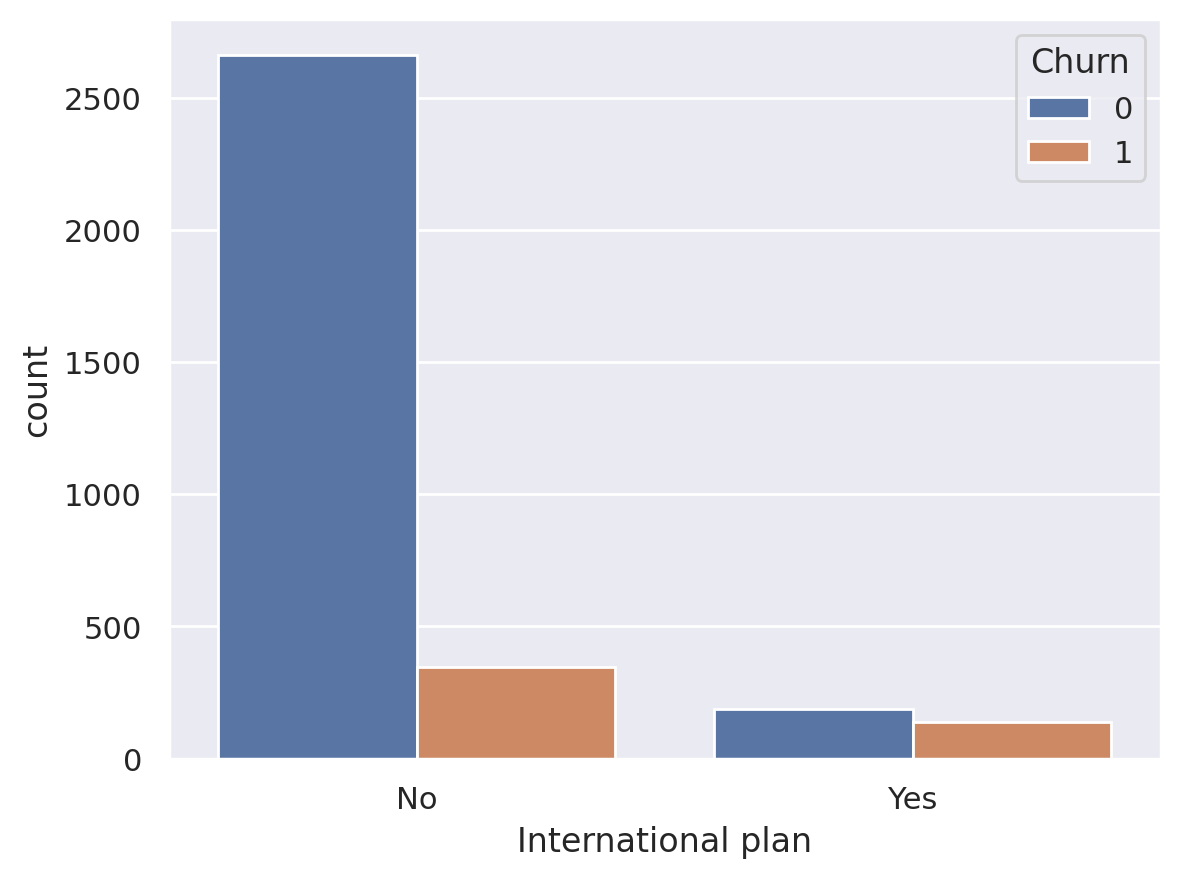

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x="International plan", hue="Churn", data=df);

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator’s customers.

Next, let’s look at another important feature – Customer service calls. Let’s also make a summary table and a picture.

In [89]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


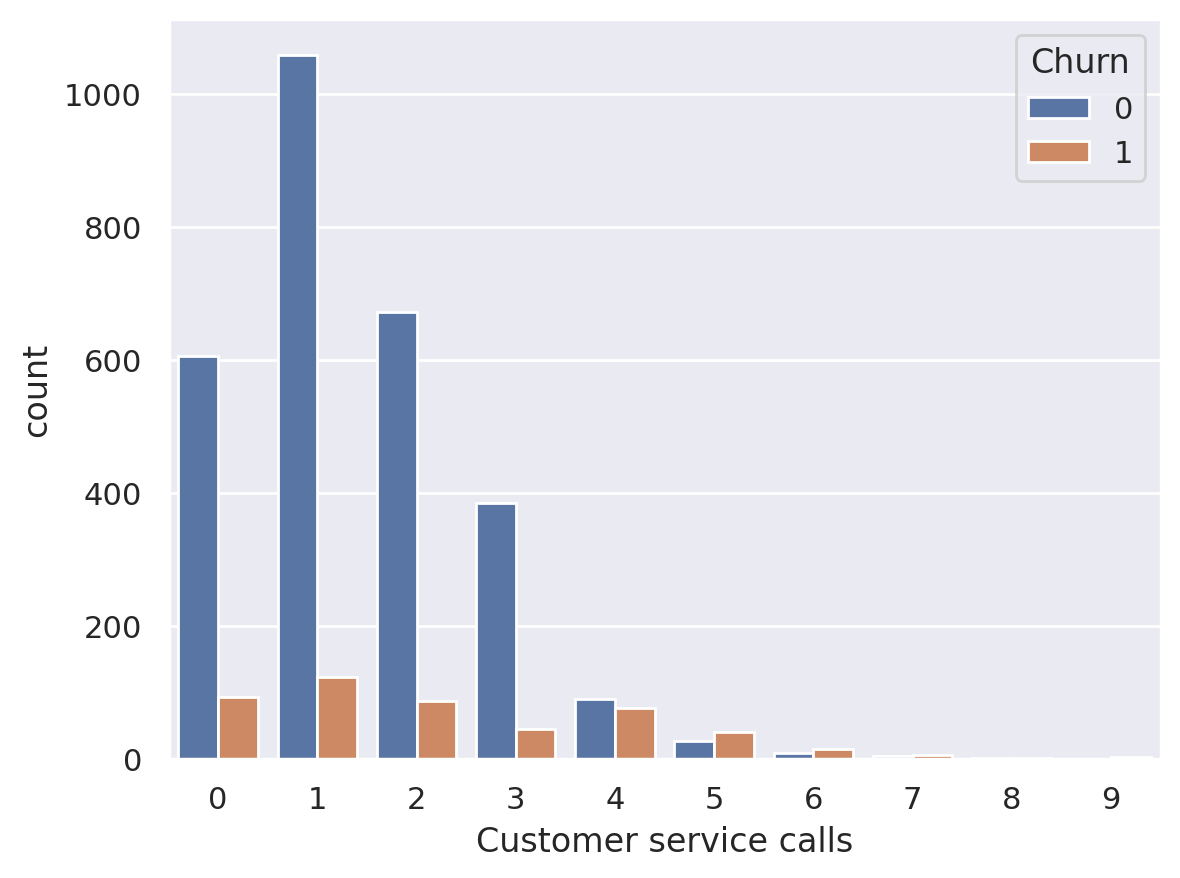

In [90]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Although it’s not so obvious from the summary table, it’s easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let’s add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let’s see how it relates to churn.

In [91]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


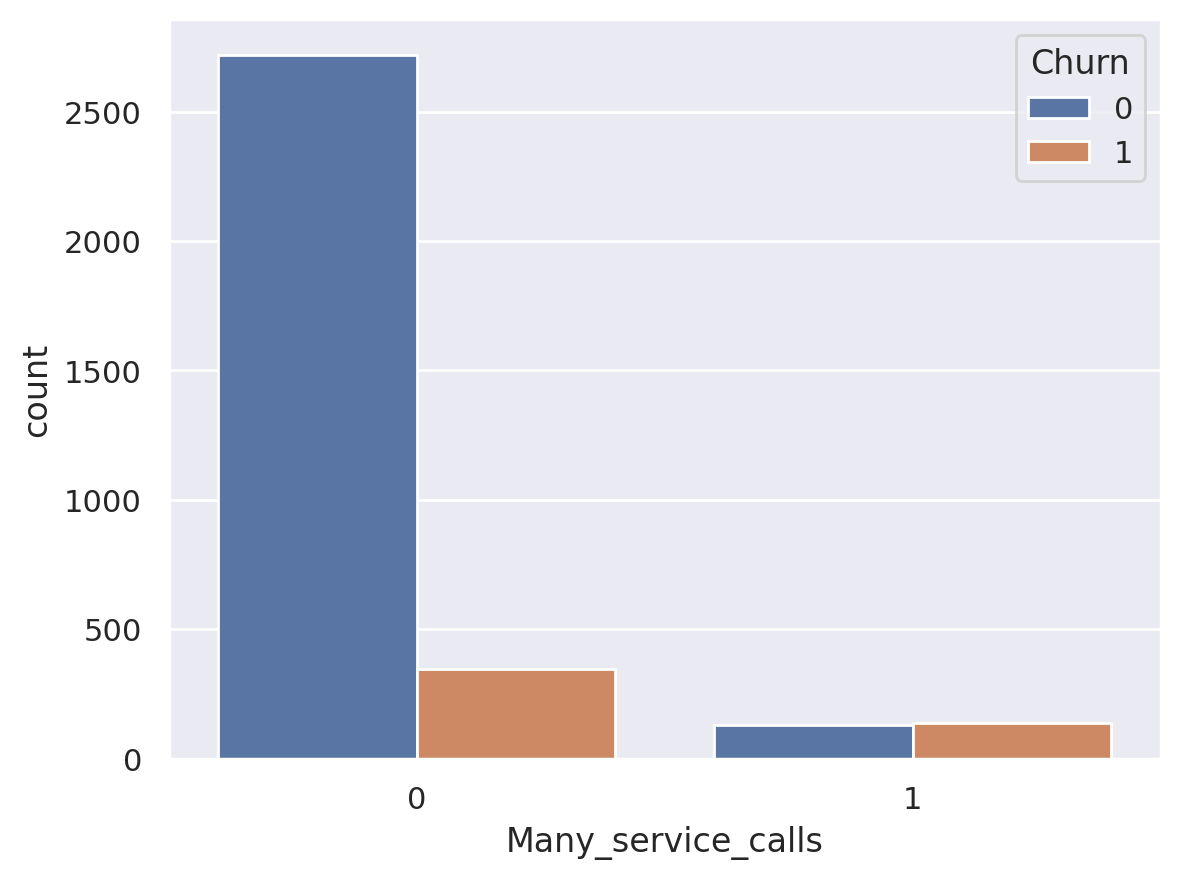

In [51]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

Done!